# Churn for Bank Customers

### The objective of this project is to create a prediction model to detect whether a customer is going to leave the bank or not

1. RowNumber—corresponds to the record (row) number and has no effect on the output.
2. CustomerId—contains random values and has no effect on customer leaving the bank.
3. Surname—the surname of a customer has no impact on their decision to leave the bank.
4. CreditScore—can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.
5. Geography—a customer’s location can affect their decision to leave the bank.
6. Gender—it’s interesting to explore whether gender plays a role in a customer leaving the bank.
7. Age—this is certainly relevant, since older customers are less likely to leave their bank than younger ones.
8. Tenure—refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.
9. Balance—also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.
10. NumOfProducts—refers to the number of products that a customer has purchased through the bank.
11. HasCrCard—denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.
12. IsActiveMember—active customers are less likely to leave the bank.
13. EstimatedSalary—as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.
14. Exited—whether or not the customer left the bank.

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Import files

In [2]:
df = pd.read_csv('churn.csv')

### Dataframe overview

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Dataframe size (rows, columns)

In [4]:
df.shape

(10000, 14)

### Dataframe search for nulls

In [5]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### Duplicate count

In [6]:
df.duplicated().sum()

0

RowNumber, CustomerId and Name are worthless for this analysis hence, they have to be dropped

In [7]:
df = df.drop(['RowNumber', 'CustomerId','Surname'], axis = 1)

### Exited status - whether or not the customer left the bank - 1 Yes - 2 No

In [8]:
from collections import Counter
target = df.values[:,-1]
counter = Counter(target)
for k,v in counter.items():
    per = v / len(target) * 100
    print('Class=%d, Count=%d, Percentage=%.3f%%' % (k, v, per))

Class=1, Count=2037, Percentage=20.370%
Class=0, Count=7963, Percentage=79.630%


### Count of '0' values across data

In [9]:
for column_name in df.columns:
    column = df[column_name]
    # Get the count of Zeros in column 
    count = (column == 0).sum()
    print('Count of zeros in column ', column_name, ' is : ', count)

Count of zeros in column  CreditScore  is :  0
Count of zeros in column  Geography  is :  0
Count of zeros in column  Gender  is :  0
Count of zeros in column  Age  is :  0
Count of zeros in column  Tenure  is :  413
Count of zeros in column  Balance  is :  3617
Count of zeros in column  NumOfProducts  is :  0
Count of zeros in column  HasCrCard  is :  2945
Count of zeros in column  IsActiveMember  is :  4849
Count of zeros in column  EstimatedSalary  is :  0
Count of zeros in column  Exited  is :  7963


Due to the huge amount of 0s in Balance, they will be replaced with the mean of the column

In [10]:
df['Balance'] = df['Balance'].replace(0, df['Balance'].mean())

### Churn per Country

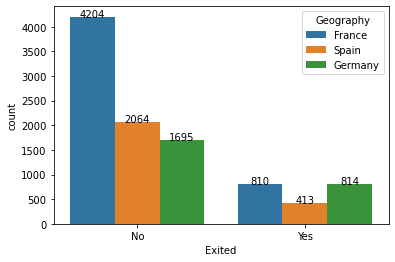

In [11]:
label = ['No', 'Yes']
ax = sns.countplot(x='Exited', hue='Geography', data=df)
ax.set_xticklabels(label)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 0.15,height ,ha="center")
plt.show()

Churns are less frequent in Spain. France and Germany are almost even.

### Churn vs Balance

[Text(0, 0, 'No'), Text(1, 0, 'Yes')]

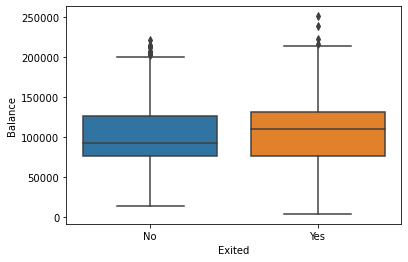

In [12]:
label = ['No', 'Yes']

ax = sns.boxplot(x='Exited',y='Balance', data=df)
ax.set_xticklabels(label)

[Text(0, 0, 'No'), Text(1, 0, 'Yes')]

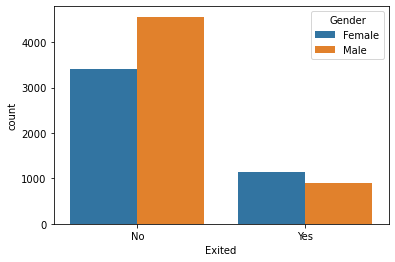

In [13]:
label = ['No', 'Yes']

ax = sns.countplot(x='Exited', hue='Gender', data = df)
ax.set_xticklabels(label)

Women tend to stay with the bank more than men.

### Churn vs Estimated Salary

[Text(0, 0, 'No'), Text(1, 0, 'Yes')]

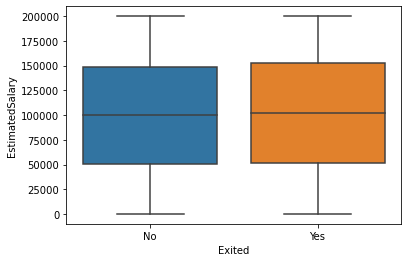

In [14]:
label = ['No', 'Yes']
ax = sns.boxplot(x='Exited', y='EstimatedSalary', data=df)
ax.set_xticklabels(label)

The amount of Churn vs Salary is quite even.

### Churn vs Has a Credit Card

[Text(0, 0, 'No'), Text(1, 0, 'Yes')]

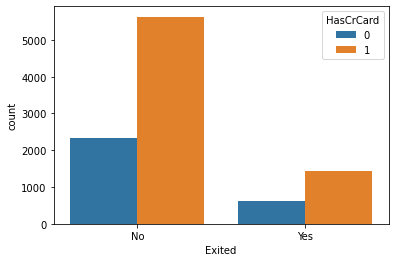

In [15]:
label = ['No', 'Yes']
ax = sns.countplot(x='Exited', hue='HasCrCard', data=df)
ax.set_xticklabels(label)


As informed earlier in data summary, people without cards tend to stay with the bank.

### Correlations

<AxesSubplot:>

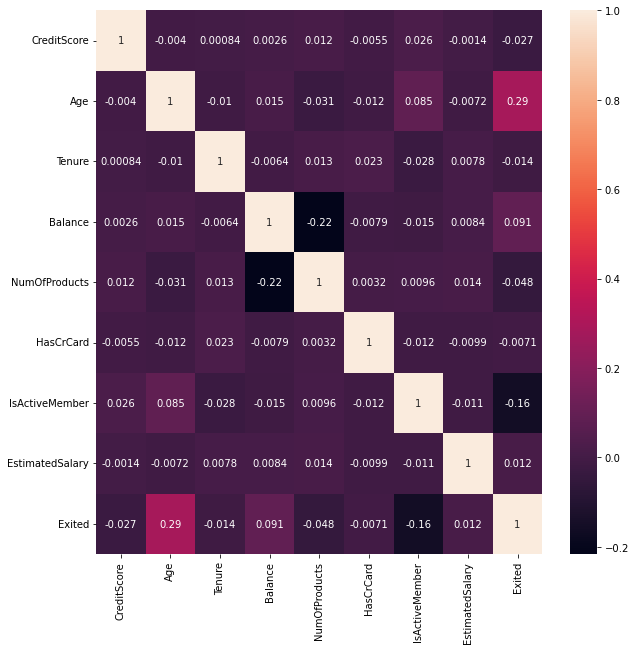

In [20]:
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True)

As said during summary, Age does seem very relevant to this analysis.

In [73]:
#Creating a copy of the original dataframe which will be used for the rest of this analysis
copy_df = df.copy()

In [74]:
dummies = pd.get_dummies(copy_df['Geography'])
copy_df = pd.concat([copy_df, dummies], axis=1)
copy_df = copy_df.drop('Geography', axis=1)

In [75]:
copy_df['Gender'] = copy_df['Gender'].apply(lambda x: 0 if x == 'Male' else 1)

In [76]:
copy_df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
0,619,1,42,2,76485.889288,1,1,1,101348.88,1,1,0,0
1,608,1,41,1,83807.860000,1,0,1,112542.58,0,0,0,1
2,502,1,42,8,159660.800000,3,1,0,113931.57,1,1,0,0
3,699,1,39,1,76485.889288,2,0,0,93826.63,0,1,0,0
4,850,1,43,2,125510.820000,1,1,1,79084.10,0,0,0,1


In [77]:
#Scaling numeric data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

cols = ['Gender','NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited', 'France', 'Germany', 'Spain']

num_cols = copy_df.drop(cols, axis = 1).columns

copy_df[num_cols] = scaler.fit_transform(copy_df[num_cols])
copy_df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
0,-0.326221,1,0.293517,-1.041760,-0.869761,1,1,1,0.021886,1,1,0,0
1,-0.440036,1,0.198164,-1.387538,-0.639565,1,0,1,0.216534,0,0,0,1
2,-1.536794,1,0.293517,1.032908,1.745183,3,1,0,0.240687,1,1,0,0
3,0.501521,1,0.007457,-1.387538,-0.869761,2,0,0,-0.108918,0,1,0,0
4,2.063884,1,0.388871,-1.041760,0.671538,1,1,1,-0.365276,0,0,0,1


In [81]:
copy_df = copy_df[['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
         'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'France', 'Germany', 'Spain', 'Exited']]

In [83]:
data = copy_df.values
X, y = data[:, :-1], data[:, -1]

In [84]:
#Handling imbalance with SMOTE
from imblearn.over_sampling import SMOTE
oversample = SMOTE(k_neighbors=4)
X, y = oversample.fit_resample(X, y)

In [87]:
#Imbalance check
target = y
counter = Counter(target)
for k,v in counter.items():
    per = v / len(target) * 100
    print('Class=%d, Count=%d, Percentage=%.3f%%' % (k, v, per))

Class=1, Count=7963, Percentage=50.000%
Class=0, Count=7963, Percentage=50.000%


In [88]:
#Splitting data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = True, test_size=0.2)

In [89]:
#Train/test shape
print('Shape of the training feature:', X_train.shape)
print('Shape of the testing feature:', X_test.shape)
print('Shape of the training label:', y_train.shape)
print('Shape of the training label:', y_test.shape)

Shape of the training feature: (12740, 12)
Shape of the testing feature: (3186, 12)
Shape of the training label: (12740,)
Shape of the training label: (3186,)


In [90]:
#Function to evalute model using multiple metrics

def model_evaluate(model, X_test, y_test):
    from sklearn import metrics
    
    #predicting test data
    y_pred = model.predict(X_test)
    
    #Calculating accuracy, precision, recall, f1 score and Kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred, average='weighted')
    rec = metrics.recall_score(y_test, y_pred, average='weighted')
    f1 = metrics.f1_score(y_test, y_pred, average='weighted')
    kappa = metrics.cohen_kappa_score(y_test, y_pred)
    
     #Create confusion matrix
    confmatrix = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            'confmatrix': confmatrix}

In [91]:
#Building Decision Tree Model
from sklearn import tree
 
dtc = tree.DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [92]:
#Decision Tree Model results
dtc_eval = model_evaluate(dtc, X_test, y_test)

# Print result
print('Accuracy:', dtc_eval['acc'])
print('Precision:', dtc_eval['prec'])
print('Recall:', dtc_eval['rec'])
print('F1 Score:', dtc_eval['f1'])
print('Cohens Kappa Score:', dtc_eval['kappa'])
print('Confusion Matrix:\n', dtc_eval['confmatrix'])

Accuracy: 0.8493408662900188
Precision: 0.8496112352939759
Recall: 0.8493408662900188
F1 Score: 0.849328398188682
Cohens Kappa Score: 0.698722217187617
Confusion Matrix:
 [[1343  261]
 [ 219 1363]]


In [93]:
#Building Random Forest Model
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [94]:
#Random Forest Model results
rf_eval = model_evaluate(rf, X_test, y_test)

# Print result
print('Accuracy:', rf_eval['acc'])
print('Precision:', rf_eval['prec'])
print('Recall:', rf_eval['rec'])
print('F1 Score:', rf_eval['f1'])
print('Cohens Kappa Score:', rf_eval['kappa'])
print('Confusion Matrix:\n', rf_eval['confmatrix'])

Accuracy: 0.9108600125549278
Precision: 0.910944037312045
Recall: 0.9108600125549278
F1 Score: 0.9108503154824461
Cohens Kappa Score: 0.8216929732183959
Confusion Matrix:
 [[1474  130]
 [ 154 1428]]


In [95]:
#Building Naive Bayes Model
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [96]:
#Naive Bayes Model results
nb_eval = model_evaluate(nb, X_test, y_test)

# Print result
print('Accuracy:', nb_eval['acc'])
print('Precision:', nb_eval['prec'])
print('Recall:', nb_eval['rec'])
print('F1 Score:', nb_eval['f1'])
print('Cohens Kappa Score:', nb_eval['kappa'])
print('Confusion Matrix:\n', nb_eval['confmatrix'])

Accuracy: 0.7259887005649718
Precision: 0.727240830907831
Recall: 0.7259887005649718
F1 Score: 0.7254916165399732
Cohens Kappa Score: 0.4516541391627398
Confusion Matrix:
 [[1230  374]
 [ 499 1083]]


In [97]:
#Building K-Nearest Neighbours Model
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [98]:
#K-Nearest Neighbours Model results
knn_eval = model_evaluate(knn, X_test, y_test)

# Print result
print('Accuracy:', knn_eval['acc'])
print('Precision:', knn_eval['prec'])
print('Recall:', knn_eval['rec'])
print('F1 Score:', knn_eval['f1'])
print('Cohens Kappa Score:', knn_eval['kappa'])
print('Confusion Matrix:\n', knn_eval['confmatrix'])

Accuracy: 0.8603264281230383
Precision: 0.8743801503285746
Recall: 0.8603264281230383
F1 Score: 0.859112773449735
Cohens Kappa Score: 0.7210108209476545
Confusion Matrix:
 [[1228  376]
 [  69 1513]]


In [106]:
#Building SVM RBF Kernel Model 
from sklearn import svm
rbf = svm.SVC(kernel='rbf', gamma=1.8, C=4).fit(X_train, y_train)

In [107]:
#SVM RBF Kernel Model results
rbf_eval = model_evaluate(rbf, X_test, y_test)

# Print result
print('Accuracy:', rbf_eval['acc'])
print('Precision:', rbf_eval['prec'])
print('Recall:', rbf_eval['rec'])
print('F1 Score:', rbf_eval['f1'])
print('Cohens Kappa Score:', rbf_eval['kappa'])
print('Confusion Matrix:\n', rbf_eval['confmatrix'])

Accuracy: 0.9494664155681105
Precision: 0.949868172411555
Recall: 0.9494664155681105
F1 Score: 0.9494605656044299
Cohens Kappa Score: 0.8989486002021241
Confusion Matrix:
 [[1500  104]
 [  57 1525]]


In [101]:
#Building SVM Poly Kernel Model
poly = svm.SVC(kernel='poly', degree=7, C=2).fit(X_train, y_train)

In [102]:
#SVM Poly Kernel Model results
poly_eval = model_evaluate(rbf, X_test, y_test)

# Print result
print('Accuracy:', poly_eval['acc'])
print('Precision:', poly_eval['prec'])
print('Recall:', poly_eval['rec'])
print('F1 Score:', poly_eval['f1'])
print('Cohens Kappa Score:', poly_eval['kappa'])
print('Confusion Matrix:\n', poly_eval['confmatrix'])

Accuracy: 0.9491525423728814
Precision: 0.9493899217938627
Recall: 0.9491525423728814
F1 Score: 0.9491500176331031
Cohens Kappa Score: 0.8983161040283318
Confusion Matrix:
 [[1505   99]
 [  63 1519]]


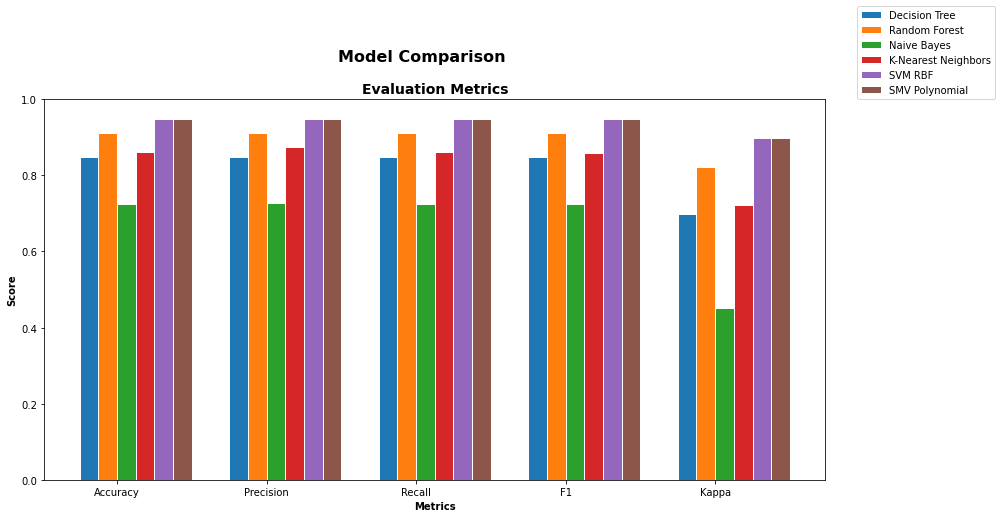

In [103]:
#Graphic Model Comparison

#Setting up figures
fig = plt.figure()
ax = fig.add_subplot(111)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.125
dtc_score = [dtc_eval['acc'], dtc_eval['prec'], dtc_eval['rec'], dtc_eval['f1'], dtc_eval['kappa']]
rf_score = [rf_eval['acc'], rf_eval['prec'], rf_eval['rec'], rf_eval['f1'], rf_eval['kappa']]
nb_score = [nb_eval['acc'], nb_eval['prec'], nb_eval['rec'], nb_eval['f1'], nb_eval['kappa']]
knn_score = [knn_eval['acc'], knn_eval['prec'], knn_eval['rec'], knn_eval['f1'], knn_eval['kappa']]
rbf_score = [rbf_eval['acc'], rbf_eval['prec'], rbf_eval['rec'], rbf_eval['f1'], rbf_eval['kappa']]
poly_score = [poly_eval['acc'], poly_eval['prec'], poly_eval['rec'], poly_eval['f1'], poly_eval['kappa']]

## Set position of bar on X axis
r1 = np.arange(len(dtc_score))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]

## Make the plot
ax.bar(r1, dtc_score, width=barWidth, edgecolor='white', label='Decision Tree')
ax.bar(r2, rf_score, width=barWidth, edgecolor='white', label='Random Forest')
ax.bar(r3, nb_score, width=barWidth, edgecolor='white', label='Naive Bayes')
ax.bar(r4, knn_score, width=barWidth, edgecolor='white', label='K-Nearest Neighbors')
ax.bar(r5, rbf_score, width=barWidth, edgecolor='white', label='SVM RBF')
ax.bar(r6, poly_score, width=barWidth, edgecolor='white', label='SMV Polynomial')

## Configure x and y axis
ax.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'Kappa']
ax.set_xticks([r + (barWidth * 1.5) for r in range(len(dtc_score))], )
ax.set_xticklabels(labels)
ax.set_ylabel('Score', fontweight='bold')
ax.set_ylim(0, 1)

## Create legend & title
ax.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax.legend()
ax.legend(loc=(1.04,1))

plt.show()

For this project we achieved a <b>94.9%</b> chance of predicting bank churns